# Расчётно-графическая работа. Кластеризация

## 1. Цель работы и постановка задачи

**Цель работы:** изучение методов кластеризации.

**Постановка задачи:**

1. Выбрать массив данных, описать параметры.

2. Провести дескриптивный анализ, оценить согласованность выборок с нормальным распределением. В соответствии с результатами обосновать выбор методов кластеризации. Проверить условия решения задачи, в том числе выбранными методами.

3. Отобрать наиболее информативные признаки при необходимости.

4. Стандартизировать переменные.

5. Построить диаграммы рассеивания по выбранным переменным. Интерпретировать результаты, оценить возможное количество кластеров, тип кластерной структуры.

6. Решить задачу кластеризации двумя методами (k-средних, иерархический, EM, DBSCAN и др). Рекомендуется выбирать методы из разных групп.

7. Оценить качество построенных моделей (в т.ч. расстояние между кластерами, внутрикластерные расстояния, компактность кластеров, центры кластеров, силуэт и т.д.). При необходимости рассчитать внешние метрики.

8. Оценить значимость признаков.

9. Провести сравнительный анализ решений.

10. Исследовать влияние параметров одного из методов на качество решения, оценить полученные результаты.

11. Интерпретировать результаты.

## 2. Описание исходных данных

В расчётно-графической работе используется датасет «Customer Segmentation (Clustering)», загруженный с платформы Kaggle. Набор данных содержит информацию о клиентах с тремя ключевыми характеристиками: возраст (Age), годовой доход (Annual Income) и оценка расходов (Spending Score). Эти атрибуты позволяют проводить анализ поведения клиентов и выявлять естественные группы для их последующей сегментации.

### Загрузка данных

Для начала загрузим датасет и выведем данные:

In [1544]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('customer_dataset.csv')
data

,Age,Annual Income (k$),Spending Score (1-100)
0,26,31,35
1,24,28,45
2,26,26,46
3,29,33,41
4,24,35,48
...,...,...,...
145,56,46,33
146,47,36,31
147,47,60,25
148,51,49,27


## 3. Предварительный анализ и подготовка данных

### 3.1. Дескриптивный анализ данных

Тип данных:

In [1545]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     150 non-null    int64
 1   Annual Income (k$)      150 non-null    int64
 2   Spending Score (1-100)  150 non-null    int64
dtypes: int64(3)
memory usage: 3.6 KB


Все признаки имеют числовые значения (int64).

Далее проверим данные на наличие пропусков:

In [1546]:
data.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Анализ показывает, что внутри набора данных отсутствуют пропущенные значения, поэтому дополнительная очистка данных не требуется. Все записи корректны и могут быть использованы для анализа и кластеризации.

Далее были рассчитаны основные статистические характеристики для каждого числового признака:

In [1547]:
data.describe().round(2)

,Age,Annual Income (k$),Spending Score (1-100)
count,150.00,150.00,150.00
mean,39.41,53.83,52.53
std,13.01,22.67,22.53
min,19.00,16.00,19.00
25%,26.00,33.00,33.00
50%,40.00,50.50,49.00
75%,52.00,73.00,73.00
max,65.00,118.00,101.00


Данные включают три ключевых признака: возраст, годовой доход и индекс трат.

Возраст (Age) клиентов варьируется от 19 до 65 лет, при этом медиана составляет 40 лет, что указывает на преобладание клиентов среднего возраста; стандартное отклонение в 13 лет отражает умеренную неоднородность выборки.

Годовой доход (Annual Income) распределён шире - от 16 до 118 тыс. долларов, со средним значением 53,8 тыс. и высокой дисперсией (std 22,7), что предполагает наличие как низко-, так и высокодоходных групп.

Показатель трат (Spending Score) имеет аналогичное стандартное отклонение (22,5) и распределён от 19 до 101, что делает его достаточно информативным признаком: часть клиентов тратит мало, а часть - очень активно.

Межквартильные интервалы по доходу и тратам почти совпадают (33-73), что позволяет ожидать хорошо различимых сегментов по уровню дохода и потребительской активности.

### 3.2. Анализ на выбросы

Проверим наличие выбросов при помощи ящика с усами:

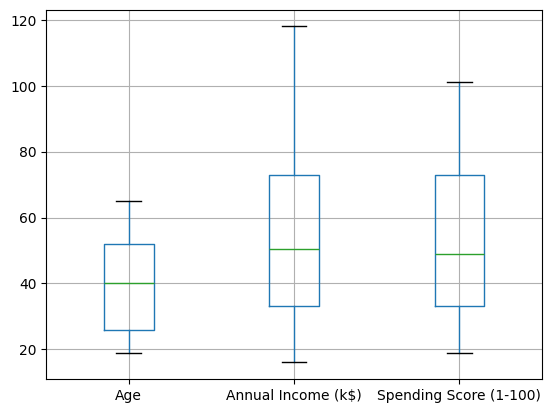

In [1548]:
data.boxplot()
plt.show()

На ящике с усами выбросы отстуствуют.

### 3.3. Гистограмма распределений

Построим гистограммы распределений:

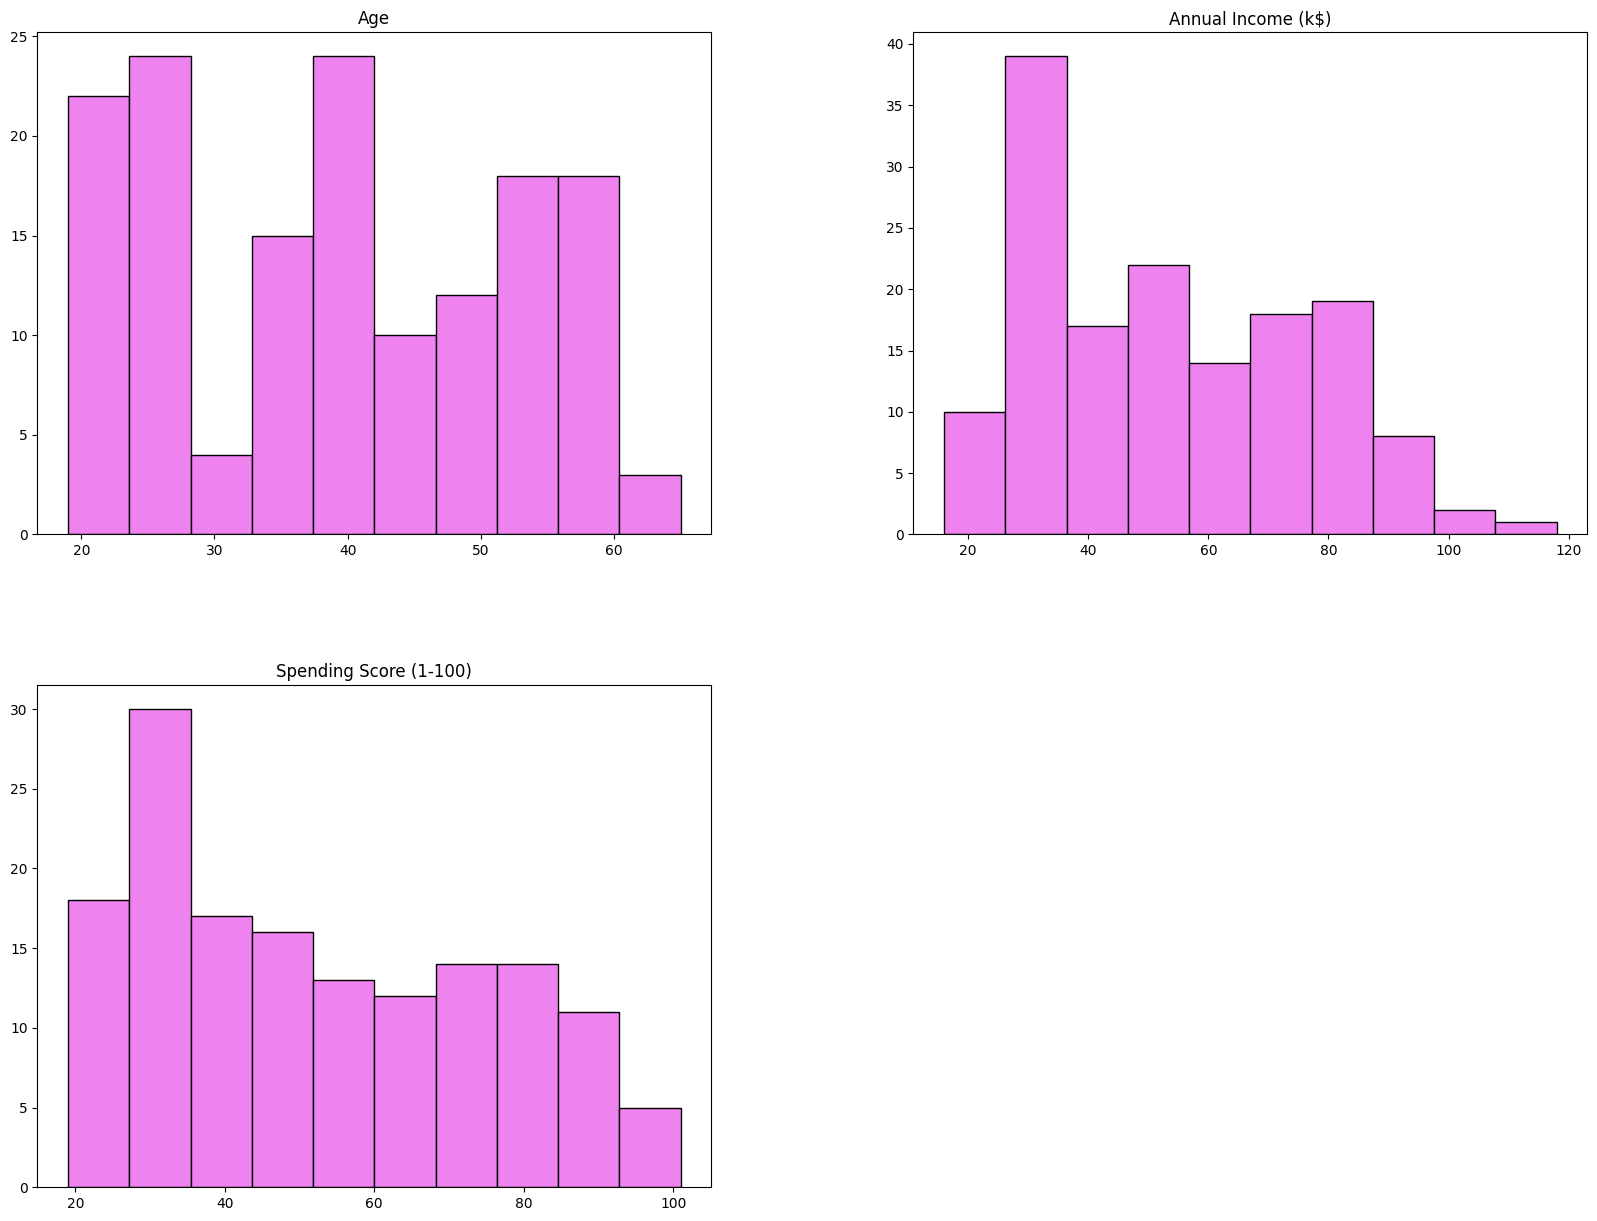

In [1549]:
data.hist(figsize=(20,15), grid=False, edgecolor='black', color='violet')
plt.show()

По гистограммам видно, что ни один из признаков датасета не имеет нормального распределения.

Age демонстрирует умеренную неоднородность и едва заметную асимметрию, что отражает наличие нескольких возрастных групп.

Annual Income распределён неравномерно и имеет выраженную растянутость - заметны как низко-, так и высокодоходные клиенты, при этом распределение далеко от гауссовского.

Spending Score также несбалансирован: наблюдаются скопления клиентов с низкими и высокими значениями индекса трат, тогда как средние значения представлены менее выражено.

Таким образом, все три признака имеют отклонения от нормальности, что делает стандартизацию или нормализацию данных необходимым шагом перед кластеризацией.

### 3.4. Матрица корреляции

Построим матрицу корреляций:

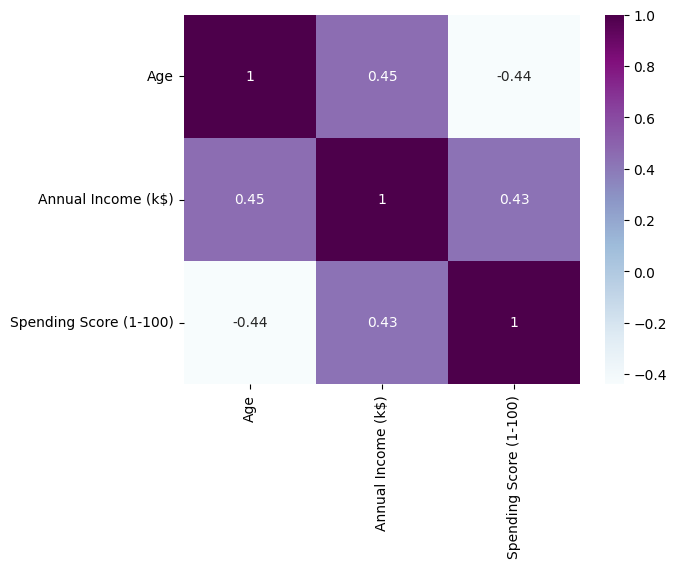

In [1550]:
sns.heatmap(data.corr(method='spearman').round(2), annot=True, cmap='BuPu')
plt.show()

Матрица корреляций показывает, что между признаками существуют лишь умеренные связи:

- Возраст отрицательно связан с индексом трат (-0,44), что указывает на снижение расходной активности с возрастом, а возраст и доход демонстрируют умеренную положительную зависимость (0,45), отражающую тенденцию роста дохода у более зрелых клиентов.

- Доход и индекс трат связаны умеренно положительно (0,43), что свидетельствует о том, что клиенты с более высоким доходом склонны тратить активнее.

- При этом отсутствие сильной корреляции между признаками указывает на то, что каждый из них несёт уникальную информацию, что повышает информативность кластеризации и позволяет более точно разделять клиентов на сегменты.

### 3.5. Нормализация данных

После очистки данных и анализа их статистических характеристик была выполнена нормализация признаков с помощью метода StandardScaler.

Выбор этого метода обусловлен тем, что признаки имеют разные масштабы и диапазоны значений. StandardScaler преобразует данные так, чтобы каждый признак имел среднее значение 0 и стандартное отклонение 1, что обеспечивает корректную работу алгоритмов кластеризации, чувствительных к масштабу признаков.

In [1551]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

data_scaled = pd.DataFrame(X_scaled, columns=data.columns)

data_scaled

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.034097,-1.010349,-0.780383
1,-1.188363,-1.143135,-0.335128
2,-1.034097,-1.231658,-0.290603
3,-0.802698,-0.921826,-0.513230
4,-1.188363,-0.833302,-0.201552
...,...,...,...
145,1.279894,-0.346422,-0.869434
146,0.585697,-0.789040,-0.958485
147,0.585697,0.273243,-1.225638
148,0.894229,-0.213637,-1.136587


In [1552]:
data_scaled.describe().round(2)

,Age,Annual Income (k$),Spending Score (1-100)
count,150.00,150.00,150.00
mean,0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-1.57,-1.67,-1.49
25%,-1.03,-0.92,-0.87
50%,0.05,-0.15,-0.16
75%,0.97,0.85,0.91
max,1.97,2.84,2.16


## 4. Диаграмма рассеивания

Для визуальной оценки структуры данных была построена матрица диаграмм рассеяния:

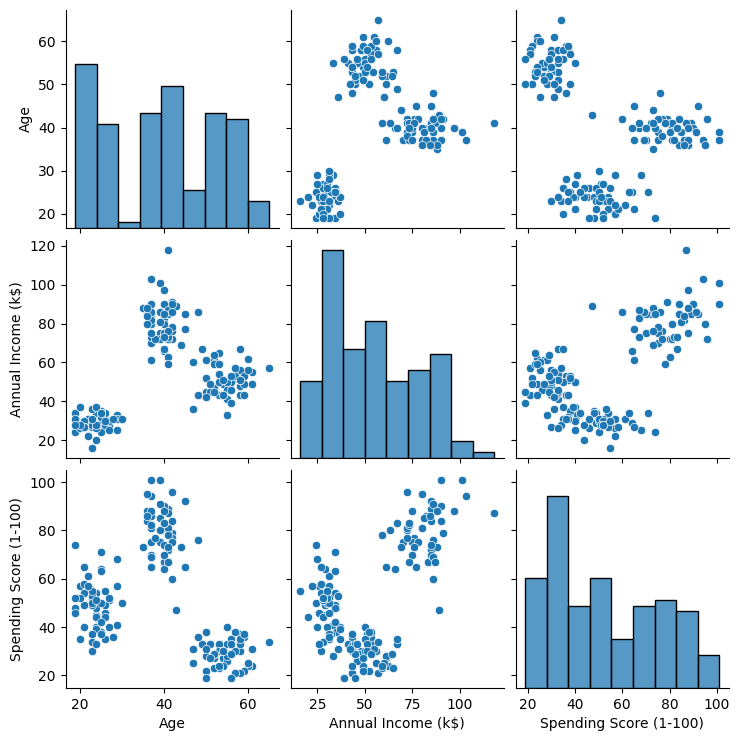

In [1553]:
sns.pairplot(data)
plt.show()

Построенная матрица диаграмм рассеивания позволяет визуально оценить структуру данных и выявить потенциальные кластеры.

На графиках объекты распределены плотными группами, что позволяет выделить 2-3 кластера. При этом каждая группа имеет более компактную форму, чем вытянутую или ленточную, что облегчает применение алгоритмов вроде k-means (k-средних) или иерархической кластеризации и подтверждает наличие хорошо различимых сегментов в данных.

## 5. Применение методов кластеризаци

### 5.1. Иерархическая кластеризация

Для выбора оптимального числа кластеров k в иерархической кластеризации можно использовать силуэт-оценку или визуальный анализ дендрограммы.

#### График силуэта

Построим график силуэта:

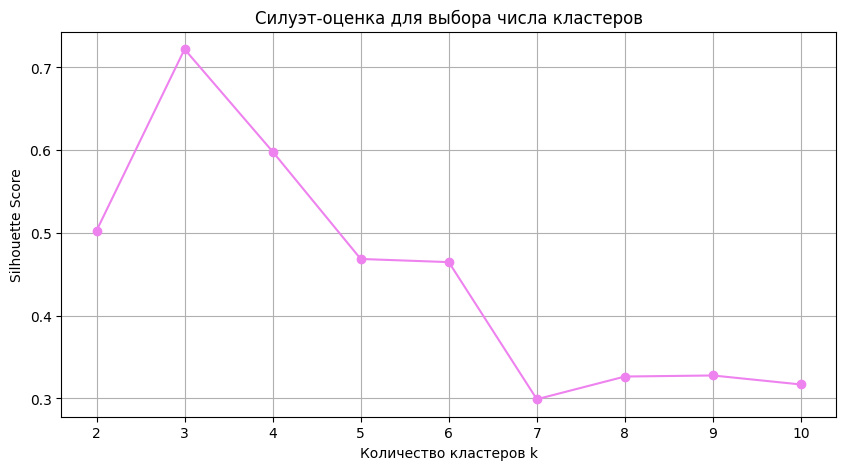

[0.5025483192580763,
 0.7216561319124224,
 0.5980339051622411,
 0.4684421218758494,
 0.4646462656093022,
 0.2991255110225368,
 0.32652812925570784,
 0.3277871331905197,
 0.31691550470707514]

In [1554]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

K_range = range(2, 11) 
silhouette = []

for k in K_range:

    ac = AgglomerativeClustering(
            n_clusters=k,
            linkage='ward',
            metric='euclidean'
         )

    labels = ac.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)

plt.figure(figsize=(10,5))
plt.plot(K_range, silhouette, marker='o', color='violet')
plt.title("Силуэт-оценка для выбора числа кластеров")
plt.xlabel("Количество кластеров k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

silhouette

Силуэты показывают, что оптимальное число k = 3, поскольку именно при этом значении достигается максимальный показатель силуэта: 0,7216. Это существенно выше, чем при любых других k, что указывает на чёткое отделение групп и хорошую внутреннюю компактность кластеров.

При k = 2 силуэт-оценка также достаточно высокая (0,5025), но заметно ниже, чем при k = 3 - это значит, что разбиение на две группы избыточно упрощает структуру данных.

Начиная с k = 4 и далее наблюдается устойчивое снижение silhouette score, что говорит о размытости и ухудшении качества кластеров при большем числе групп.

#### Дендрограмма

Построим дендрограмму:

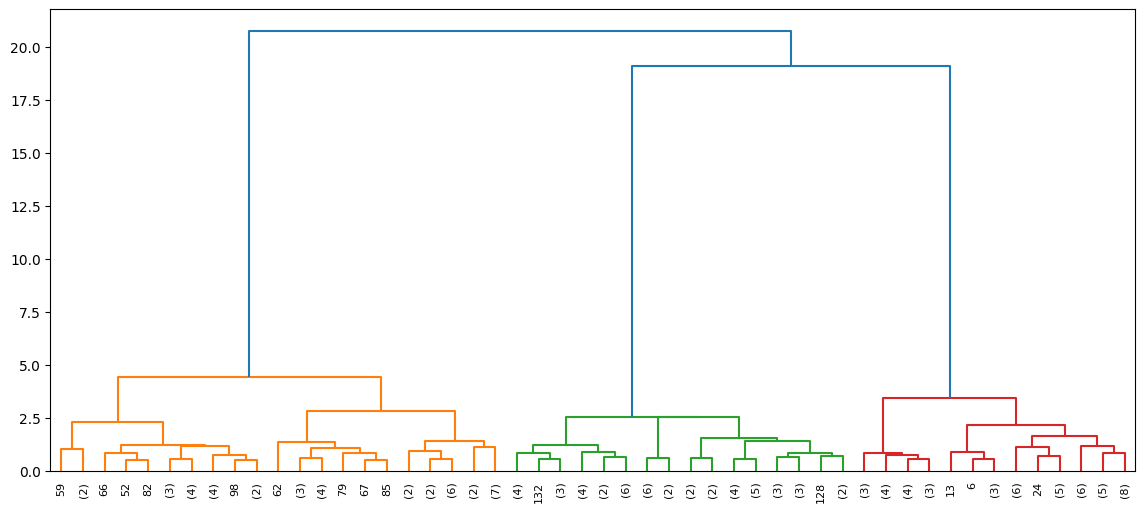

In [1555]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(14, 6))

dendrogram(
    linkage(X_scaled, method='ward', metric='euclidean'),
    truncate_mode='lastp',
    p=50
)

plt.grid(False)
plt.show()

На этой дендрограмме можно выделить 3 кластера: дальнейшее объединение происходит на значительно большем расстоянииие.

Построим модель и выведем центры кластеров:

In [1556]:
model_ac = AgglomerativeClustering(
            n_clusters=3,
            linkage='ward',
            metric='euclidean'
           )

y_ac = model_ac.fit_predict(X_scaled)

centroids_ac_array = data_scaled.groupby(y_ac).mean().to_numpy()
centroids_ac = pd.DataFrame(centroids_ac_array, columns=data.columns)

centroids_ac

,Age,Annual Income (k$),Spending Score (1-100)
0,0.027254,1.202741,1.191205
1,-1.200704,-1.073201,-0.156136
2,1.173450,-0.129540,-1.035069


### 5.2. Метод k-средних (k-means)

Для выбора оптимального числа кластеров k для метода k-средних (k-means) используется график силуэта и метод локтя.

#### График силуэта и метод локтя

Построим график силуэта и график метода локтя:

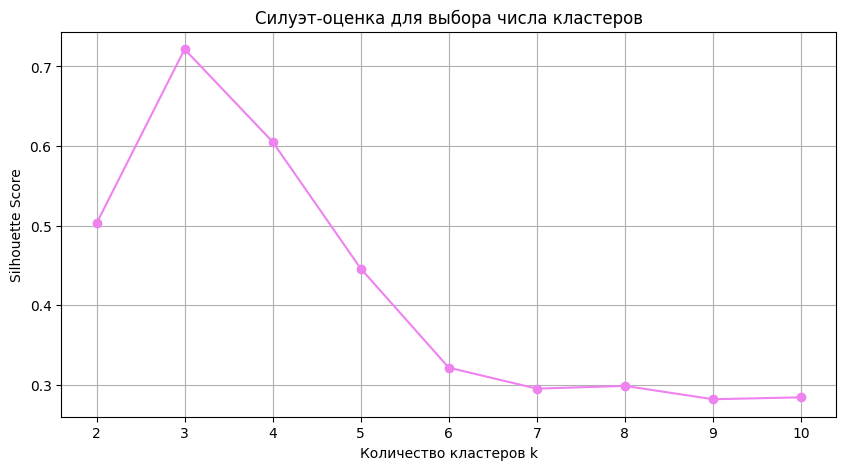

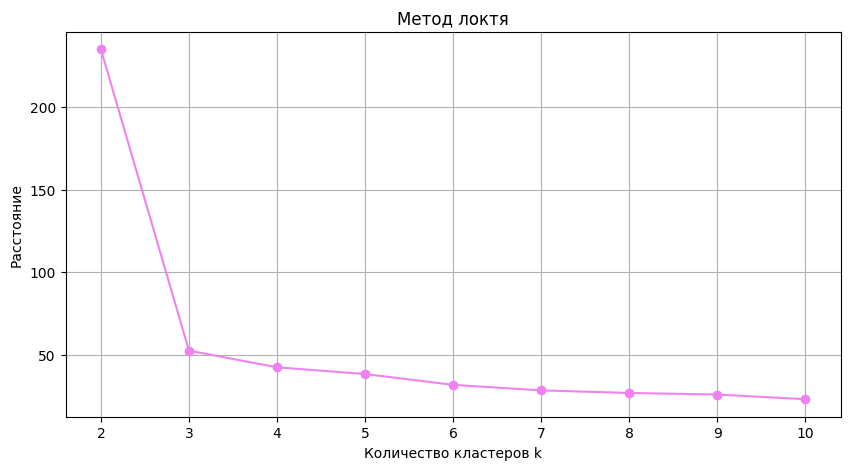

In [1557]:
from sklearn.cluster import KMeans

K_range = range(2, 11) 
silhouette = []
inertias = []

for k in K_range:
    kmeans = KMeans(
                n_clusters=k,
                init='k-means++',
                random_state = 42
             )

    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K_range, silhouette, marker='o', color='violet')
plt.title("Силуэт-оценка для выбора числа кластеров")
plt.xlabel("Количество кластеров k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(K_range, inertias, marker='o', color='violet')
plt.title("Метод локтя")
plt.xlabel("Количество кластеров k")
plt.ylabel("Расстояние")
plt.grid(True)
plt.show()

На основании анализа графиков определения оптимального числа кластеров для алгоритма k-средних (k-means) установлено, что метод силуэта показывает наилучшее качество кластеризации при k = 3 (значение метрики около 0,72), что свидетельствует о чётком разделении объектов на группы.

Метод локтя также демонстрирует выраженную точку перегиба при k = 3, что подтверждает выбор данного количества кластеров. Таким образом, оба метода согласованно указывают на оптимальность разбиения данных на три кластера.

Построим модель и выведем центры кластеров:

In [1558]:
kmeans = KMeans(
            n_clusters=3,
            init='k-means++'
         )

y_kmeans = kmeans.fit_predict(X_scaled)

centroids_array = kmeans.cluster_centers_
centroids_kmeans = pd.DataFrame(centroids_array, columns=data.columns)

centroids_kmeans

,Age,Annual Income (k$),Spending Score (1-100)
0,0.027254,1.202741,1.191205
1,1.173450,-0.129540,-1.035069
2,-1.200704,-1.073201,-0.156136


## 6. Качество кластеризации

### 6.1. Внутренние метрики

Для оценки качества кластеризации были использованы внутренние метрики, которые позволяют оценить разбиение данных, опираясь исключительно на информацию, содержащуюся в самих данных, без использования внешних эталонов или заранее известных меток классов:

In [1559]:
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)

# Среднее межкластерное расстояние
def distances(centroids):
    dist_matrix = cdist(centroids.values, centroids.values, metric='euclidean')
    pairwise_distances = pdist(centroids.values, metric='euclidean')
    mean_distance = pairwise_distances.mean()
    distances = pd.DataFrame(dist_matrix)

    return distances, mean_distance


_, mean_distance_ac = distances(centroids_ac)
_, mean_distance_kmeans = distances(centroids_kmeans)


# Среднее внутрикластерное расстояние
def intra_distances(centroids, y_pred):
    intra_distances = []

    for i in range(len(centroids)):
        cluster_points = X_scaled[y_pred == i]
        centroid = centroids.iloc[i].to_numpy().reshape(1, -1)
        distances = cdist(cluster_points, centroid, metric='euclidean')
        mean_distance = distances.mean()
        intra_distances.append(mean_distance)

    return np.mean(intra_distances)


intra_ac = intra_distances(centroids_ac, y_ac)
intra_kmeans = intra_distances(centroids_kmeans, y_kmeans)


# Компактность (WSS)
def cluster_cohesion(X, labels):
    X = np.array(X)
    labels = np.array(labels)
    clusters = np.unique(labels)
    WSS = 0.0
    per_cluster_wss = {}

    for cluster in clusters:
        if (cluster == -1):
            continue

        points = X[labels == cluster]
        mean_cluster = points.mean(axis=0)
        wss = np.sum(np.linalg.norm(points - mean_cluster, axis=1) ** 2)
        per_cluster_wss[cluster] = float(wss)
        WSS += wss

    return float(WSS)


wss_ac = cluster_cohesion(X_scaled, y_ac)
wss_kmeans = cluster_cohesion(X_scaled, y_kmeans)


# Силуэт-оценка
ac_silhouette_score = silhouette_score(X_scaled, y_ac)
kmeans_silhouette_score = silhouette_score(X_scaled, y_kmeans)


# Calinski–Harabasz и Davies–Bouldin
ch_ac = calinski_harabasz_score(X_scaled, y_ac)
db_ac = davies_bouldin_score(X_scaled, y_ac)

ch_kmeans = calinski_harabasz_score(X_scaled, y_kmeans)
db_kmeans = davies_bouldin_score(X_scaled, y_kmeans)


# Итоговая таблица метрик
metric = pd.DataFrame({
    "Внутренние метрики": [
        "Среднее межкластерное расстояние",
        "Среднее внутрикластерное расстояние",
        "Компактность",
        "Силуэт",
        "Calinski–Harabasz",
        "Davies–Bouldin",
    ],
    "Иерархическая кластеризация": [
        mean_distance_ac,
        intra_ac,
        wss_ac,
        ac_silhouette_score,
        ch_ac,
        db_ac
    ],
    "Метод k-средних (k-means)": [
        mean_distance_kmeans,
        intra_kmeans,
        wss_kmeans,
        kmeans_silhouette_score,
        ch_kmeans,
        db_kmeans
    ]
})

metric


,Внутренние метрики,Иерархическая кластеризация,Метод k-средних (k-means)
0,Среднее межкластерное расстояние,2.818056,2.818056
1,Среднее внутрикластерное расстояние,0.527616,0.527616
2,Компактность,52.537069,52.537069
3,Силуэт,0.721656,0.721656
4,Calinski–Harabasz,556.055488,556.055488
5,Davies–Bouldin,0.386169,0.386169


Итоговое сравнение внутренних метрик показывает, что результаты иерархической кластеризации и метода k-средних полностью совпадают по всем показателям:

- Средние межкластерные (2,818) и внутрикластерные расстояния (0,528) имеют одинаковые значения, что говорит о равной степени разделённости и плотности кластеров.

- Метрики компактности (52,537), силуэта (0,722), Calinski-Harabasz (556,05) и Davies-Bouldin (0,386) также идентичны, что подтверждает, что оба алгоритма выделили одну и ту же структуру данных. 

Это связано с тем, что кластеры в датасете хорошо разделены, отсутствуют выбросы, а признаки были предварительно стандартизированы.

### 6.2. Внешние метрики

Поскольку в данных отсутствуют истинные классы, вычисление внешних метрик качества кластеризации (таких как индекс Rand, индекс Жаккара и другие) невозможно.

### 6.3. Визуализация распределения признаков по кластерам (диаграмма «ящик с усами»)

#### 6.3.1. Иерархическая кластеризация

Построим диаграммы «ящик с усами» для каждого признака по кластерам, чтобы визуально оценить распределение значений внутри групп и сравнить признаки между кластерами, полученными методом иерархической кластеризации:

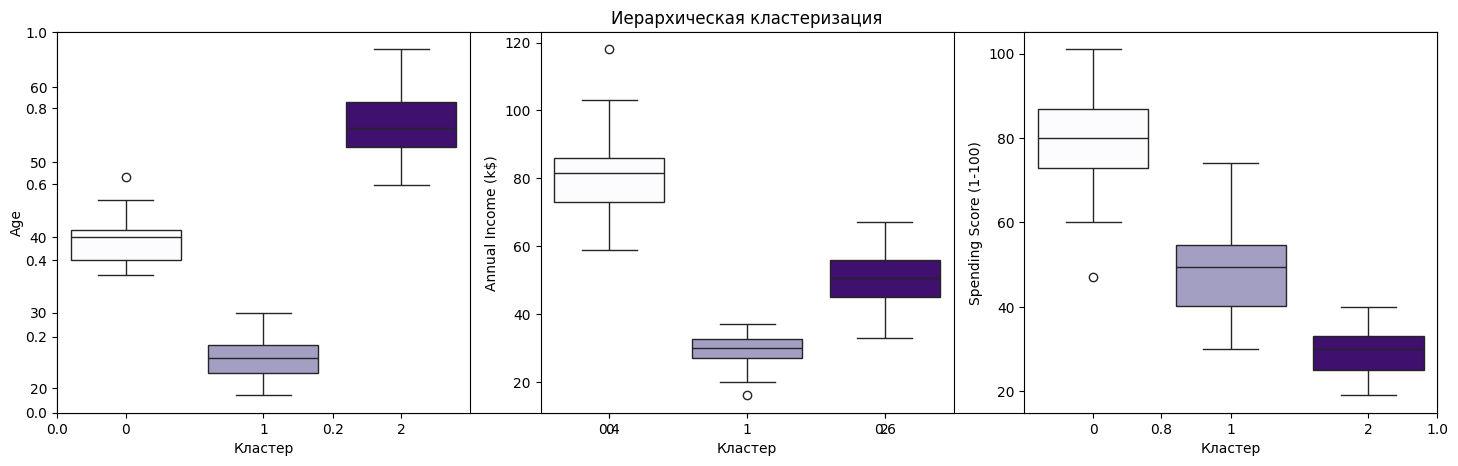

In [1560]:
data_box = data.copy()
data_box['Cluster'] = y_ac

plt.figure(figsize=(15,5))
plt.title('Иерархическая кластеризация')

for i, col in enumerate(data.columns):
    plt.subplot(1, len(data.columns), i+1)
    sns.boxplot(x='Cluster', y=col, data=data_box, hue='Cluster', palette='Purples', legend=False)
    plt.xlabel('Кластер')

plt.tight_layout()
plt.show()

Диаграммы «ящик с усами» показывают, что иерархическая кластеризация чётко разделила клиентов на три группы, каждая из которых имеет свои характерные значения возраста, дохода и уровня трат:

- Кластер 0 - клиенты со средним возрастом, высоким доходом и высокими тратами. Группа наиболее платёжеспособная.

- Кластер 1 - клиенты младшего возраста, с низким доходом и умеренными тратами.

- Кластер 2 - клиенты старшего возраста, со средним доходом и низкими тратами.

Такое разделение хорошо согласуется с визуальной структурой данных и подтверждает корректность выделенных кластеров.

#### 6.3.2. Метод k-средних (k-means)

Построим диаграммы «ящик с усами» для каждого признака по кластерам, полученным методом k-средних, чтобы визуально оценить распределение значений внутри групп и сравнить средние уровни признаков между кластерами:

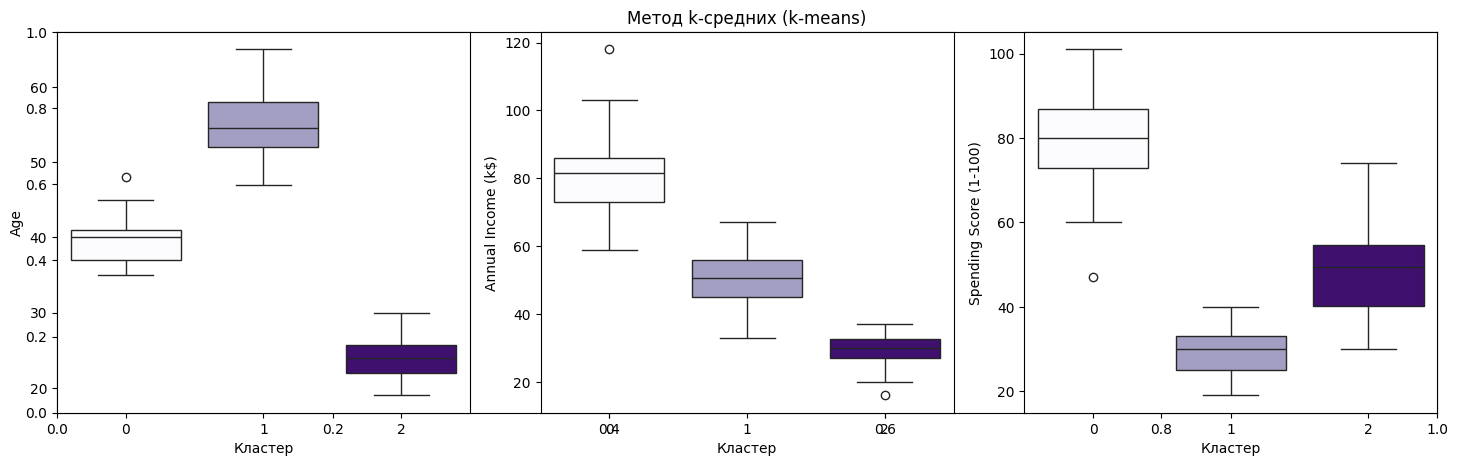

In [1561]:
data_box = data.copy()
data_box['Cluster'] = y_kmeans

plt.figure(figsize=(15,5))
plt.title('Метод k-средних (k-means)')

for i, col in enumerate(data.columns):
    plt.subplot(1, len(data.columns), i+1)
    sns.boxplot(x='Cluster', y=col, data=data_box, hue='Cluster', palette='Purples', legend=False)
    plt.xlabel('Кластер')

plt.tight_layout()
plt.show()

Диаграммы «ящик с усами» показывают, что метод k-средних также выделяет три отчётливые группы клиентов, отличающиеся по возрасту, уровню дохода и тратам:

- Кластер 0 - клиенты младшего возраста, с низким доходом и умеренными тратами.

- Кластер 1 - клиенты старшего возраста, со средним доходом и низким уровнем трат.

- Кластер 2 - клиенты среднего возраста, с высоким доходом и высокими тратами.

Распределения полностью согласуются с результатами иерархической кластеризации, что подтверждает устойчивость и чёткость кластерной структуры в данных.

Для обеих моделей - иерархической кластеризации и k-средних - видно, что кластеры хорошо различаются по средним значениям признаков Age, Annual Income (k$) и Spending Score (1-100). Средние значения признаков внутри кластеров различны, что позволяет наглядно отделять группы клиентов друг от друга. При этом в большинстве случаев средние значения кластеров совпадают между методами, что подтверждает согласованность выделенных групп и устойчивость структуры данных. Это говорит о том, что оба алгоритма выявляют схожие сегменты клиентов, несмотря на различие подходов к кластеризации.

### 6.4. Значимость признаков

Оценим значимость признаков методом ANOVA (f-test) (однофакторный дисперсионный анализ), чтобы определить, какие признаки вносят наибольший вклад в формирование кластеров для метода иерархической кластеризации и метода k-средних (k-means):

In [1562]:
from sklearn.feature_selection import f_classif

def anova(labels):
    F_values, p_values = f_classif(X_scaled, labels)

    return pd.DataFrame({
        'feature': data.columns,
        'F_value': F_values,
        'p_value': p_values
    }).sort_values(by='F_value', ascending=False)

print('Значимость признаков метода иерахической кластеризации:\n', anova(y_ac), '\n')
print('Значимость признаков метода k-средних (k-means):\n', anova(y_kmeans))

Значимость признаков метода иерахической кластеризации:
                   feature      F_value       p_value
0                     Age  1147.554157  1.981994e-90
1      Annual Income (k$)   499.415310  2.834477e-66
2  Spending Score (1-100)   380.871174  7.119143e-59 

Значимость признаков метода k-средних (k-means):
                   feature      F_value       p_value
0                     Age  1147.554157  1.981994e-90
1      Annual Income (k$)   499.415310  2.834477e-66
2  Spending Score (1-100)   380.871174  7.119143e-59


Анализ значимости признаков показал, что для обоих методов кластеризации - иерархического и k-средних (k-means) - наиболее влиятельным фактором при разделении клиентов является возраст (F = 1147, p ≈ 0), за ним следуют годовой доход (F = 499) и индекс трат (F = 381), при этом крайне малые p-value для всех признаков подтверждают их статистическую значимость.

Совпадение результатов обоих алгоритмов указывает на стабильную структуру данных, где возраст оказывает наибольшее влияние на формирование кластеров, а доход и индекс трат вносят умеренный вклад.

## 7. Визуализация кластеров

Перед построением графиков сведём данные к двум главным компонентам с помощью PCA (метод главных компонент), чтобы визуально представить кластеры в 2D-пространстве. Затем отобразим результаты кластеризации для методов иерархической кластеризации (Agglomerative clustering) и k-средних (k-means), включая положения центроидов.

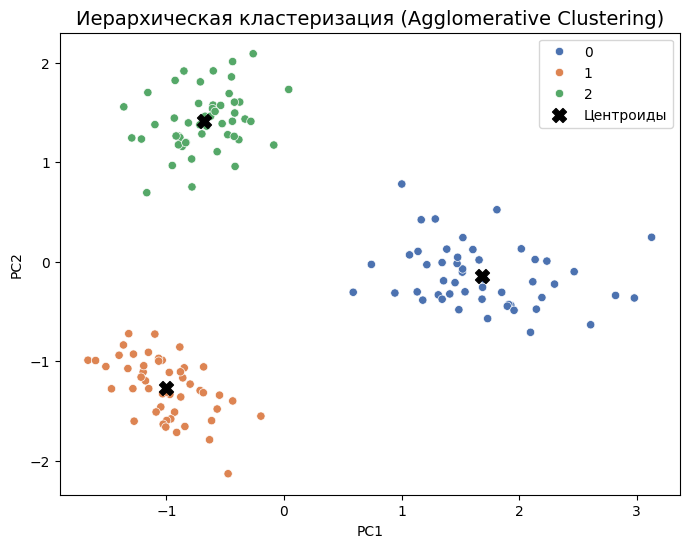

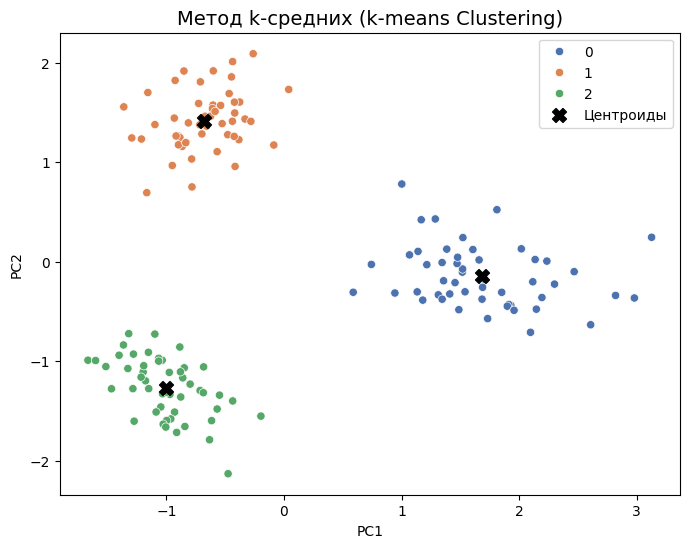

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

def plot_pca_scatter(X_pca, labels, title, centroids=None):
    plt.figure(figsize=(8,6))
    sns.scatterplot( x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='deep',legend='full')

    if centroids is not None:
        centroids_np = np.array(centroids)
        centroids_pca = pca.transform(centroids_np)
        plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],c='black', s=100, marker='X', label='Центроиды')

    plt.title(title, fontsize=14)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

plot_pca_scatter(X_pca, y_ac, title='Иерархическая кластеризация (Agglomerative clustering)', centroids=centroids_ac)
plot_pca_scatter(X_pca, y_kmeans, title='Метод k-средних (k-means clustering)', centroids=centroids_kmeans)

Визуализация позволяет наглядно оценить структуру кластеров после снижения размерности до двух компонент. Кластеры оказались хорошо разделимы в 2D-пространстве, что согласуется с ранее рассчитанными количественными метриками качества.

На первом графике видно, что метод корректно выделяет три компактные группы: кластеры расположены достаточно далеко друг от друга, внутренняя плотность точек высокая, а вычисленные центры кластеров находятся близко к визуальным центрам выделенных областей. Несмотря на то, что агломеративный метод не использует центроиды в процессе обучения, их последующее вычисление позволяет оценить компактность кластеров и расстояние между ними. Кластеры получаются относительно симметричными, что подтверждается высоким значением силуэта.

На втором графике результаты метода k-средних демонстрируют аналогичное разделение на три группы. Центроиды k-средних (отмеченные крестиками) находятся в геометрических центрах кластеров - характерная особенность метода. Форма и плотность кластеров совпадают с результатами иерархической кластеризации, что подтверждает стабильность структуры данных. Разделение групп выражено отчетливо, хотя на границах может наблюдаться небольшое количество точек, относящихся к соседним кластерам.

Оба алгоритма выявляют одинаковое количество кластеров и аналогичные группы наблюдений. Форма кластеров близка к эллиптической, что хорошо подходит для k-средних. Иерархическая кластеризация чуть более «сосредоточена» на плотных областях, что делает её иногда более устойчивой к выбросам. Визуально границы кластеров совпадают, что подтверждает выводы из метрик качества: различий между методами практически нет.

Таким образом, визуальный анализ подтверждает корректность применения выбранных методов и демонстрирует, что данные обладают хорошо выраженной кластерной структурой, а выявленные сегменты клиентов стабильны и логично интерпретируются.

## 8. Исследование влияния параметров алгоритма на качество

Исследуем влияние количества кластеров k на метод иерархической кластеризации.

Для выбора оптимального числа кластеров в иерархической кластеризации переберём значения k от 2 до 6, для каждого варианта построим визуализацию кластеров и рассчитаем внутренние метрики качества (средние меж- и внутрикластерные расстояния, компактность, силуэт, Calinski-Harabasz и Davies-Bouldin). Результаты сведём в итоговую таблицу.

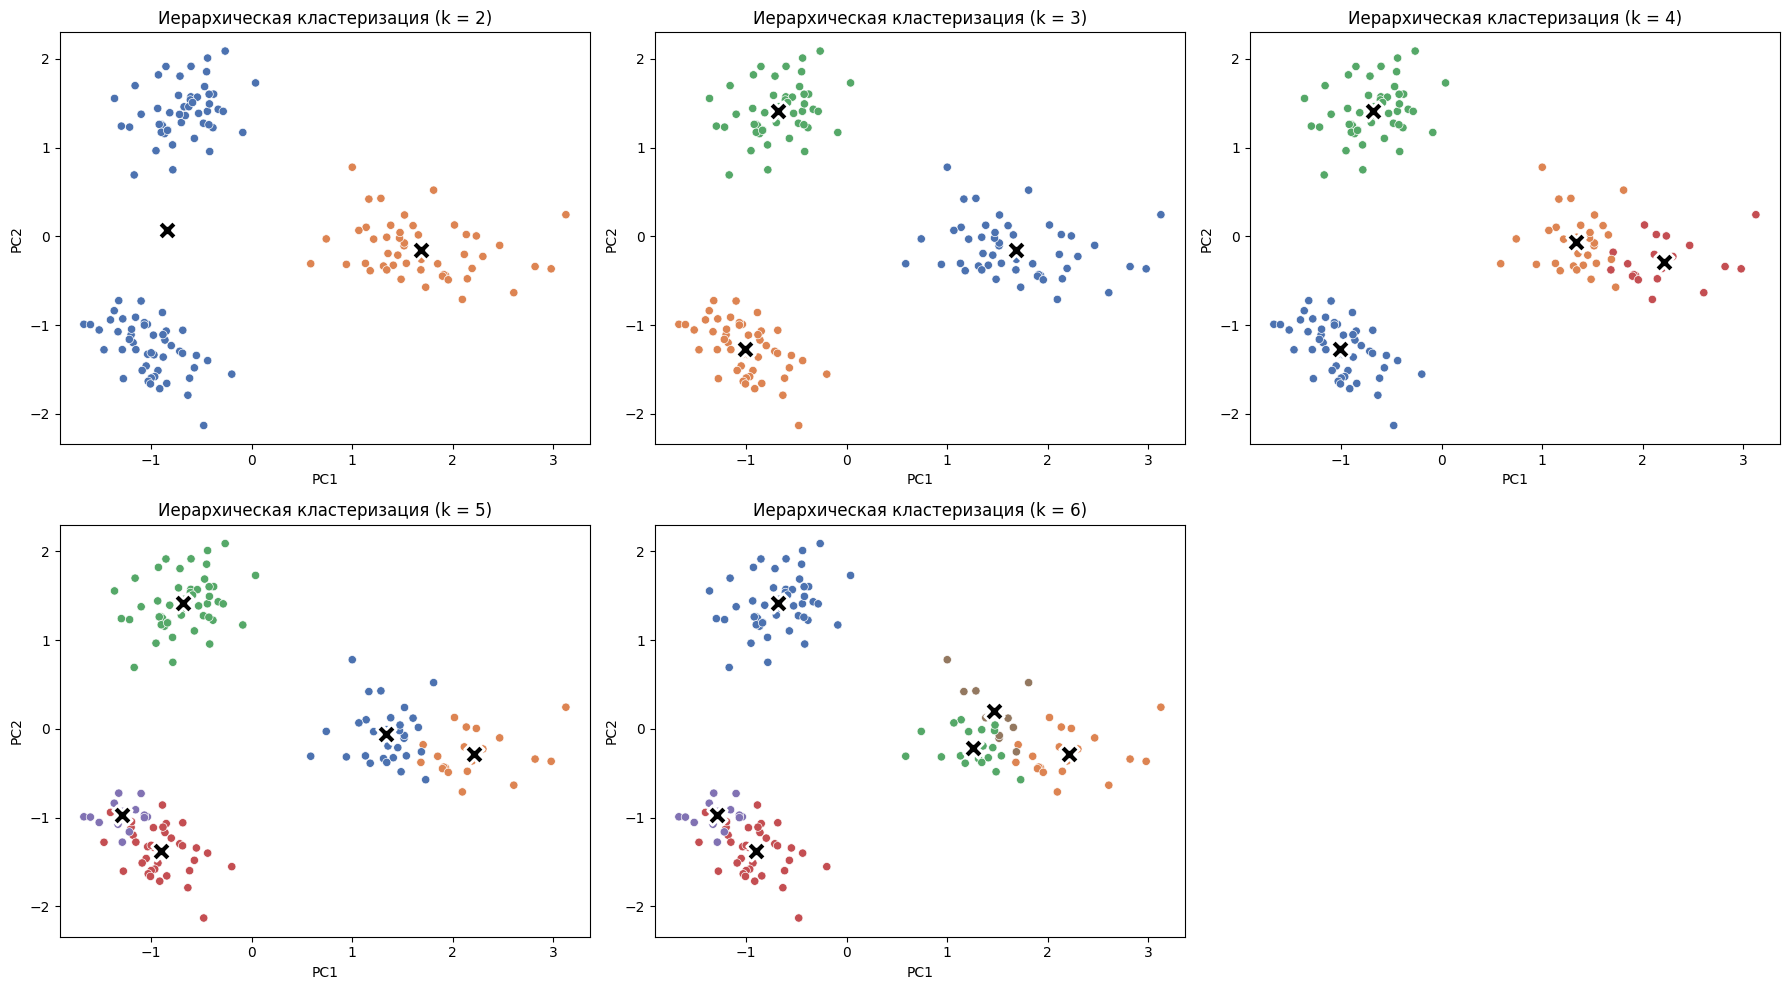

,k,Среднее межкластерное расстояние,Среднее внутрикластерное расстояние,Kомпактность,Силуэт,Calinski-Harabasz,Davies-Bouldin
0,2,2.539521,1.024713,235.027775,0.502548,135.370763,0.807013
1,3,2.818056,0.527616,52.537069,0.721656,556.055488,0.386169
2,4,2.576024,0.481967,42.758964,0.598034,463.506644,0.728976
3,5,2.511869,0.422802,36.863568,0.468442,406.260067,0.857168
4,6,2.342034,0.395894,32.919457,0.464646,364.888144,0.830307


In [1564]:
K_range = range(2, 7)
results = []

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, k in enumerate(K_range):
    ac = AgglomerativeClustering(
            n_clusters=k,
            linkage='ward',
            metric='euclidean'
         )
    y_pred = ac.fit_predict(X_scaled)

    # центроиды в исходном пространстве признаков
    centroids_a_array = data_scaled.groupby(y_pred).mean().to_numpy()
    centroids_a = pd.DataFrame(centroids_a_array, columns=data.columns)

    # центроиды переносим в PCA
    centroids_pca = pca.transform(centroids_a.values)

    ax = axes[idx]

    # рисуем PCA точки
    sns.scatterplot(
        x=X_pca[:, 0], y=X_pca[:, 1],
        hue=y_pred, palette='deep',
        ax=ax, legend=False
    )

    # рисуем центроиды в PCA
    ax.scatter(
        centroids_pca[:, 0], centroids_pca[:, 1],
        c='black', s=200, marker='X',
        edgecolor='white', linewidth=2
    )

    ax.set_title(f'Иерархическая кластеризация (k = {k})')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

    # метрики
    wss = cluster_cohesion(X_scaled, y_pred)

    _, mean_distance_ac = distances(centroids_a)
    intra_ac = intra_distances(centroids_a, y_pred)
    wss_ac = cluster_cohesion(X_scaled, y_pred)
    silhouette = silhouette_score(X_scaled, y_pred)
    ch_ac = calinski_harabasz_score(X_scaled, y_pred)
    db_ac = davies_bouldin_score(X_scaled, y_pred)

    results.append({
        'k': k,
        'Среднее межкластерное расстояние': mean_distance_ac,
        'Среднее внутрикластерное расстояние': intra_ac,
        'Kомпактность': wss_ac,
        'Силуэт': silhouette,
        'Calinski-Harabasz': ch_ac,
        'Davies-Bouldin': db_ac
    })

# пустые оси - скрыть
for j in range(len(K_range), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

results_df = pd.DataFrame(results)
results_df

Анализ влияния параметра k (количество кластеров) на качество модели показывает, что при k = 2 среднее межкластерное расстояние составляет 2,54, а среднее внутрикластерное расстояние - 1,02. Компактность кластеров высока (235,03), индекс Силуэта равен 0,50, Calinski-Harabasz - 135,37, а Davies-Bouldin - 0,81, что указывает на относительно слабое разделение и низкую плотность кластеров. При увеличении k до 3 наблюдается рост межкластерного расстояния до 2,82 и снижение внутрикластерного до 0,53, компактность резко падает до 52,54, индекс Силуэта достигает максимума 0,72, Calinski-Harabasz растёт до 556,06, а Davies-Bouldin снижается до 0,39, что говорит о значительном улучшении качества кластеризации.

Дальнейшее увеличение числа кластеров k до 4-6 сопровождается снижением межкластерных расстояний (2,58 → 2,34) и внутрикластерных (0,48 → 0,40), компактность постепенно уменьшается (42,76 → 32,92), индекс Силуэта падает (0,60 → 0,46), Calinski-Harabasz снижается (463,5 → 364,89), а Davies-Bouldin растёт (0,73 → 0,83). Это свидетельствует о том, что при больших k - кластеры становятся более мелкими и менее различимыми, то есть модель начинает дробить естественные группы.

На основе этих показателей оптимальным значением числа кластеров является k = 3.

## 9. Заключение

В ходе выполнения расчётно-графической работы были проведены все основные этапы анализа данных и кластеризации: выполнен предварительный анализ и масштабирование данных, определено оптимальное количество кластеров, реализованы два метода кластеризации - иерархическая (Agglomerative clustering) и k-средних (k-means), рассчитаны метрики качества, а также выполнена визуализация результатов с использованием метода главных компонент (PCA).

Обе модели продемонстрировали высокую согласованность результатов. Методы иерархической кластеризации и k-средних выявили одинаковое число кластеров и распределили объекты по группам сходным образом. На двумерной проекции PCA видно, что точки формируют три компактные и хорошо отделимые группы. Независимо от выбранного алгоритма структура кластеров остаётся устойчивой.

Метод k-средних минимизирует внутрикластерные расстояния, размещая центроиды в геометрических центрах групп. Метод иерархической кластеризации последовательно объединяет объекты на основе расстояний, однако итоговое разбиение полностью совпадает с результатами k-средних.

Такое совпадение результатов двух принципиально разных алгоритмов свидетельствует о том, что данные обладают хорошо выраженной естественной кластерной структурой, а полученные кластеры отражают реальные закономерности распределения объектов. Это подтверждается как визуально, так и количественно - значениями силуэта, внутрикластерных расстояний и расстояний между центрами кластеров.

Таким образом, можно заключить, что выбранные методы кластеризации являются применимыми и эффективными для данного набора данных. Они позволяют надёжно выявить три выраженных сегмента, пригодные для последующей интерпретации, профилирования объектов и принятия аналитических решений.
